# Dimensionality reduction

# 1)- Importing key Modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

#  Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'viridis'

# 2)- Loading Dataset

In [4]:
df = pd.read_csv('telecom_churn.csv').dropna()
print(df.shape)

(3333, 20)


## 2.1)-t-SNE

In [6]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [7]:
# normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[ 0.67648946, -0.52360328, -0.32758048, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505, -0.52360328, -0.32758048, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.52360328, -0.32758048, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [-1.83505538,  1.71881732, -0.32758048, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 2.08295458,  1.71881732,  3.05268496, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.67974475, -0.52360328, -0.32758048, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [9]:
# build t-SNE

tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

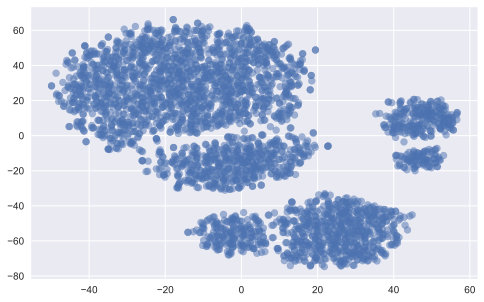

In [10]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

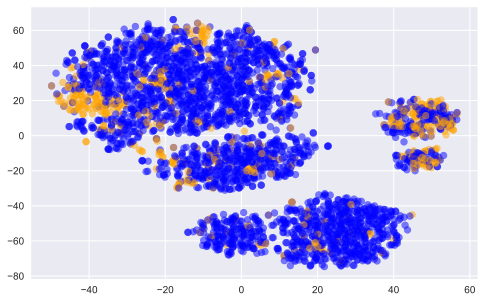

In [11]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

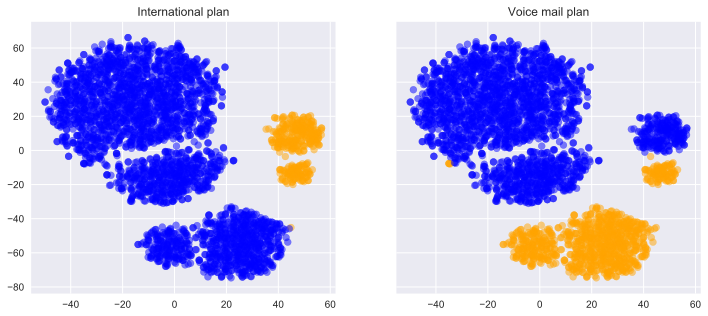

In [12]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);